In [58]:
import numpy as np
import pandas as pd
import seaborn as sns

import plotly.offline as py
import plotly.graph_objs as go
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.impute import KNNImputer,IterativeImputer,SimpleImputer
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

.

.

In [59]:
df = pd.read_csv('database_IND.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
for col in df.columns:
    print(col," : ",len(df[col].unique()))

country  :  1
country_long  :  1
name  :  907
gppd_idnr  :  907
capacity_mw  :  361
latitude  :  837
longitude  :  828
primary_fuel  :  8
other_fuel1  :  4
other_fuel2  :  2
other_fuel3  :  1
commissioning_year  :  74
owner  :  281
source  :  191
url  :  304
geolocation_source  :  4
wepp_id  :  1
year_of_capacity_data  :  2
generation_gwh_2013  :  1
generation_gwh_2014  :  372
generation_gwh_2015  :  397
generation_gwh_2016  :  404
generation_gwh_2017  :  409
generation_gwh_2018  :  411
generation_gwh_2019  :  1
generation_data_source  :  2
estimated_generation_gwh  :  1


In [61]:
df = df.drop(['country','country_long','other_fuel3','wepp_id','generation_gwh_2013','generation_gwh_2019','estimated_generation_gwh','url','name','gppd_idnr','geolocation_source'],axis=1)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   other_fuel1             198 non-null    object 
 5   other_fuel2             1 non-null      object 
 6   commissioning_year      527 non-null    float64
 7   owner                   342 non-null    object 
 8   source                  907 non-null    object 
 9   year_of_capacity_data   519 non-null    float64
 10  generation_gwh_2014     398 non-null    float64
 11  generation_gwh_2015     422 non-null    float64
 12  generation_gwh_2016     434 non-null    float64
 13  generation_gwh_2017     440 non-null    float64
 14  generation_gwh_2018     448 non-null    fl

In [63]:
df = df.drop(['other_fuel2','owner','other_fuel1','commissioning_year'],axis=1)

In [64]:
for col in df.columns:
    print(col," : ",len(df[col].unique()))

capacity_mw  :  361
latitude  :  837
longitude  :  828
primary_fuel  :  8
source  :  191
year_of_capacity_data  :  2
generation_gwh_2014  :  372
generation_gwh_2015  :  397
generation_gwh_2016  :  404
generation_gwh_2017  :  409
generation_gwh_2018  :  411
generation_data_source  :  2


In [65]:
value_count=df[['primary_fuel','year_of_capacity_data','generation_data_source']]

In [66]:
for col in value_count.columns:
    print(col," : ",value_count[col].value_counts())

primary_fuel  :  Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
year_of_capacity_data  :  2019.0    519
Name: year_of_capacity_data, dtype: int64
generation_data_source  :  Central Electricity Authority    449
Name: generation_data_source, dtype: int64


In [67]:
df = df.drop(['year_of_capacity_data','generation_data_source'],axis=1)

<Axes: >

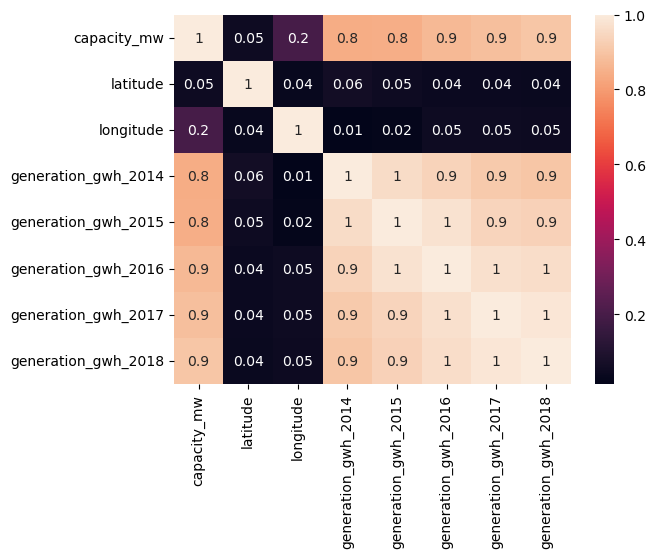

In [68]:
sns.heatmap(df.corr(),fmt='.1g',annot=True)

## Multicolinearity is present

.

In [69]:
df = df.drop(['generation_gwh_2014','generation_gwh_2015','generation_gwh_2018','generation_gwh_2016','generation_gwh_2017'],axis=1)

<Axes: >

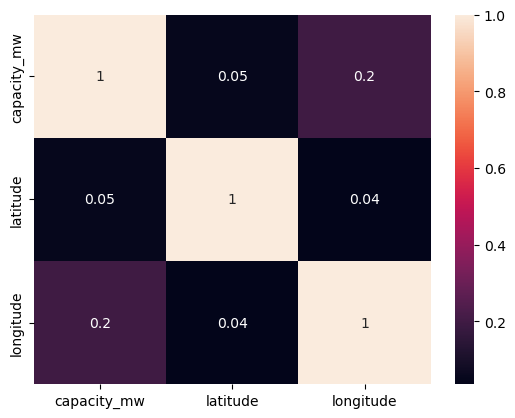

In [70]:
sns.heatmap(df.corr(),fmt='.1g',annot=True)

In [71]:
df.describe()

,capacity_mw,latitude,longitude
count,907.000000,861.000000,861.000000
mean,326.223755,21.197918,77.464907
std,590.085456,6.239612,4.939316
min,0.000000,8.168900,68.644700
25%,16.725000,16.773900,74.256200
50%,59.200000,21.780000,76.719500
75%,385.250000,25.512400,79.440800
max,4760.000000,34.649000,95.408000


In [72]:
df

,capacity_mw,latitude,longitude,primary_fuel,source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd
2,39.2,21.9038,69.3732,Wind,CDM
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority
...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited
904,25.5,15.2758,75.5811,Wind,CDM
905,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd


.

.

In [73]:
knni = KNNImputer(n_neighbors=2)
df[['latitude','longitude']] = knni.fit_transform(df[['latitude','longitude']])

In [74]:
df.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [75]:
import plotly.offline as py
import plotly.graph_objs as go
TYPES = df.groupby('primary_fuel')['capacity_mw'].agg('sum')
values = [TYPES['Coal'],TYPES['Hydro'],TYPES['Solar'],TYPES['Wind'],TYPES['Gas'],TYPES['Biomass'],TYPES['Oil'],TYPES['Nuclear']]
labels= ['Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear']

graph = go.Pie(labels=labels,values=values)
py.iplot([graph])

.

.

In [76]:
x = df.drop('capacity_mw',axis=1)
y = df['capacity_mw']

In [77]:
x['source'].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [78]:
top_2 = [x for x in x['source'].value_counts().sort_values(ascending=False).head(2).index]

for label in top_2:
    x[label]= np.where(x['source']==label,1,0)
    
x[['source']+top_2].head()

,source,Central Electricity Authority,CDM
0,National Renewable Energy Laboratory,0,0
1,Ultratech Cement ltd,0,0
2,CDM,0,1
3,Central Electricity Authority,1,0
4,Central Electricity Authority,1,0


In [79]:
dummy = pd.get_dummies(x['primary_fuel'])
x = pd.concat([x,dummy],axis='columns')

x=x.drop(['source','primary_fuel'],axis=1)
x

,latitude,longitude,Central Electricity Authority,CDM,Biomass,Coal,Gas,Hydro,Nuclear,Oil,Solar,Wind
0,28.1839,73.2407,0,0,0,0,0,0,0,0,1,0
1,24.7663,74.6090,0,0,0,1,0,0,0,0,0,0
2,21.9038,69.3732,0,1,0,0,0,0,0,0,0,1
3,23.8712,91.3602,1,0,0,0,1,0,0,0,0,0
4,21.9603,82.4091,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,1,0,0,1,0,0,0,0,0,0
903,12.8932,78.1654,0,0,0,0,0,0,0,0,1,0
904,15.2758,75.5811,0,1,0,0,0,0,0,0,0,1
905,24.3500,73.7477,0,0,0,1,0,0,0,0,0,0


.

.

In [80]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   latitude                       907 non-null    float64
 1   longitude                      907 non-null    float64
 2   Central Electricity Authority  907 non-null    int32  
 3   CDM                            907 non-null    int32  
 4   Biomass                        907 non-null    uint8  
 5   Coal                           907 non-null    uint8  
 6   Gas                            907 non-null    uint8  
 7   Hydro                          907 non-null    uint8  
 8   Nuclear                        907 non-null    uint8  
 9   Oil                            907 non-null    uint8  
 10  Solar                          907 non-null    uint8  
 11  Wind                           907 non-null    uint8  
dtypes: float64(2), int32(2), uint8(8)
memory usage: 28

In [81]:
x.skew()

latitude                        -0.149698
longitude                        1.141881
Central Electricity Authority   -0.292409
CDM                              2.118424
Biomass                          3.904966
Coal                             0.957114
Gas                              3.203310
Hydro                            0.999736
Nuclear                          9.905160
Oil                              6.520208
Solar                            2.078180
Wind                             2.132112
dtype: float64

In [82]:
x.describe()

,latitude,longitude,Central Electricity Authority,CDM,Biomass,Coal,Gas,Hydro,Nuclear,Oil,Solar,Wind
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,21.197918,77.464907,0.572216,0.136714,0.055127,0.284454,0.076075,0.276736,0.009923,0.022051,0.140022,0.135612
std,6.079148,4.812291,0.495030,0.343735,0.228353,0.451403,0.265264,0.447632,0.099173,0.146930,0.347201,0.342565
min,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.072000,74.388900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.281800,76.979200,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,25.176450,79.206100,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,34.649000,95.408000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

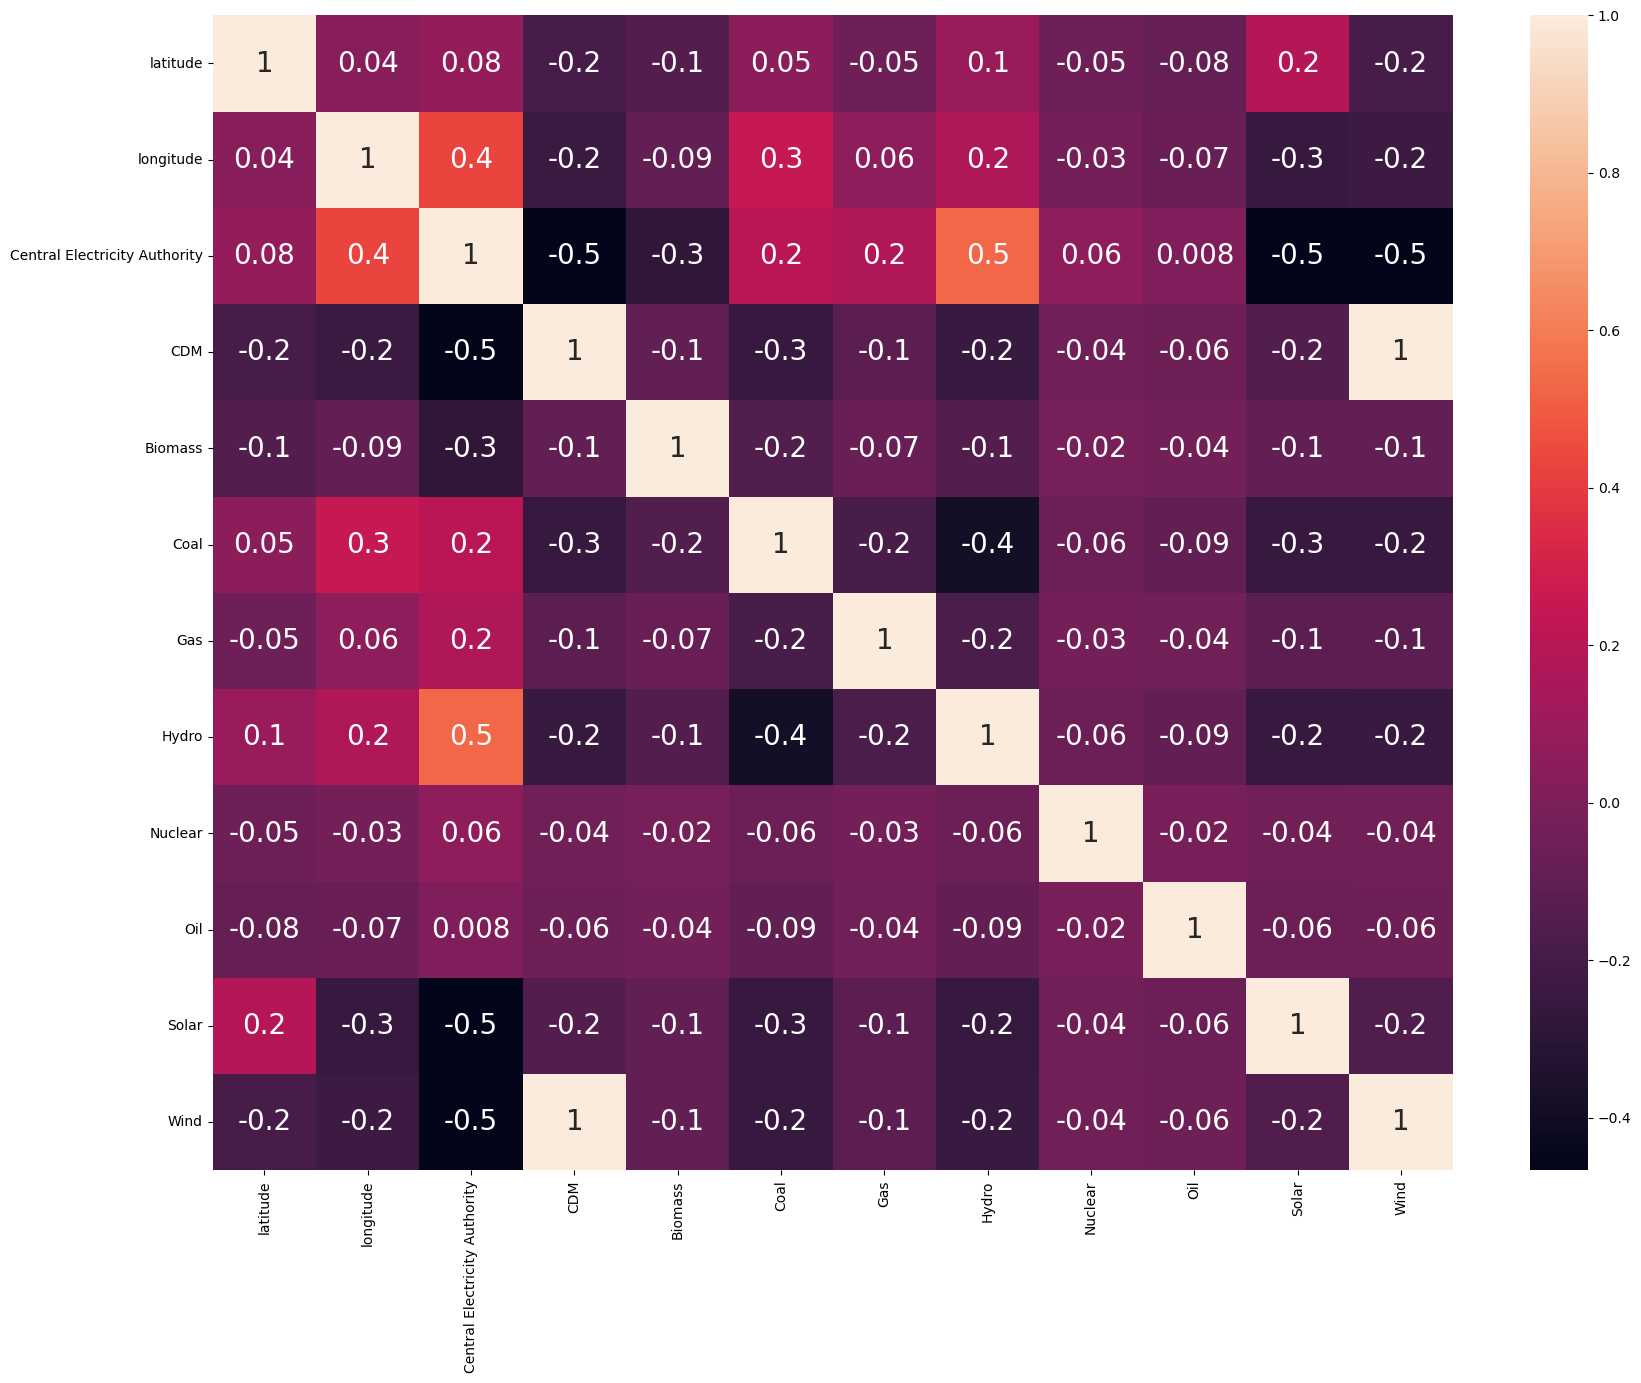

In [83]:
plt.figure(figsize=(20,15))
sns.heatmap(x.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':20})

<Axes: >

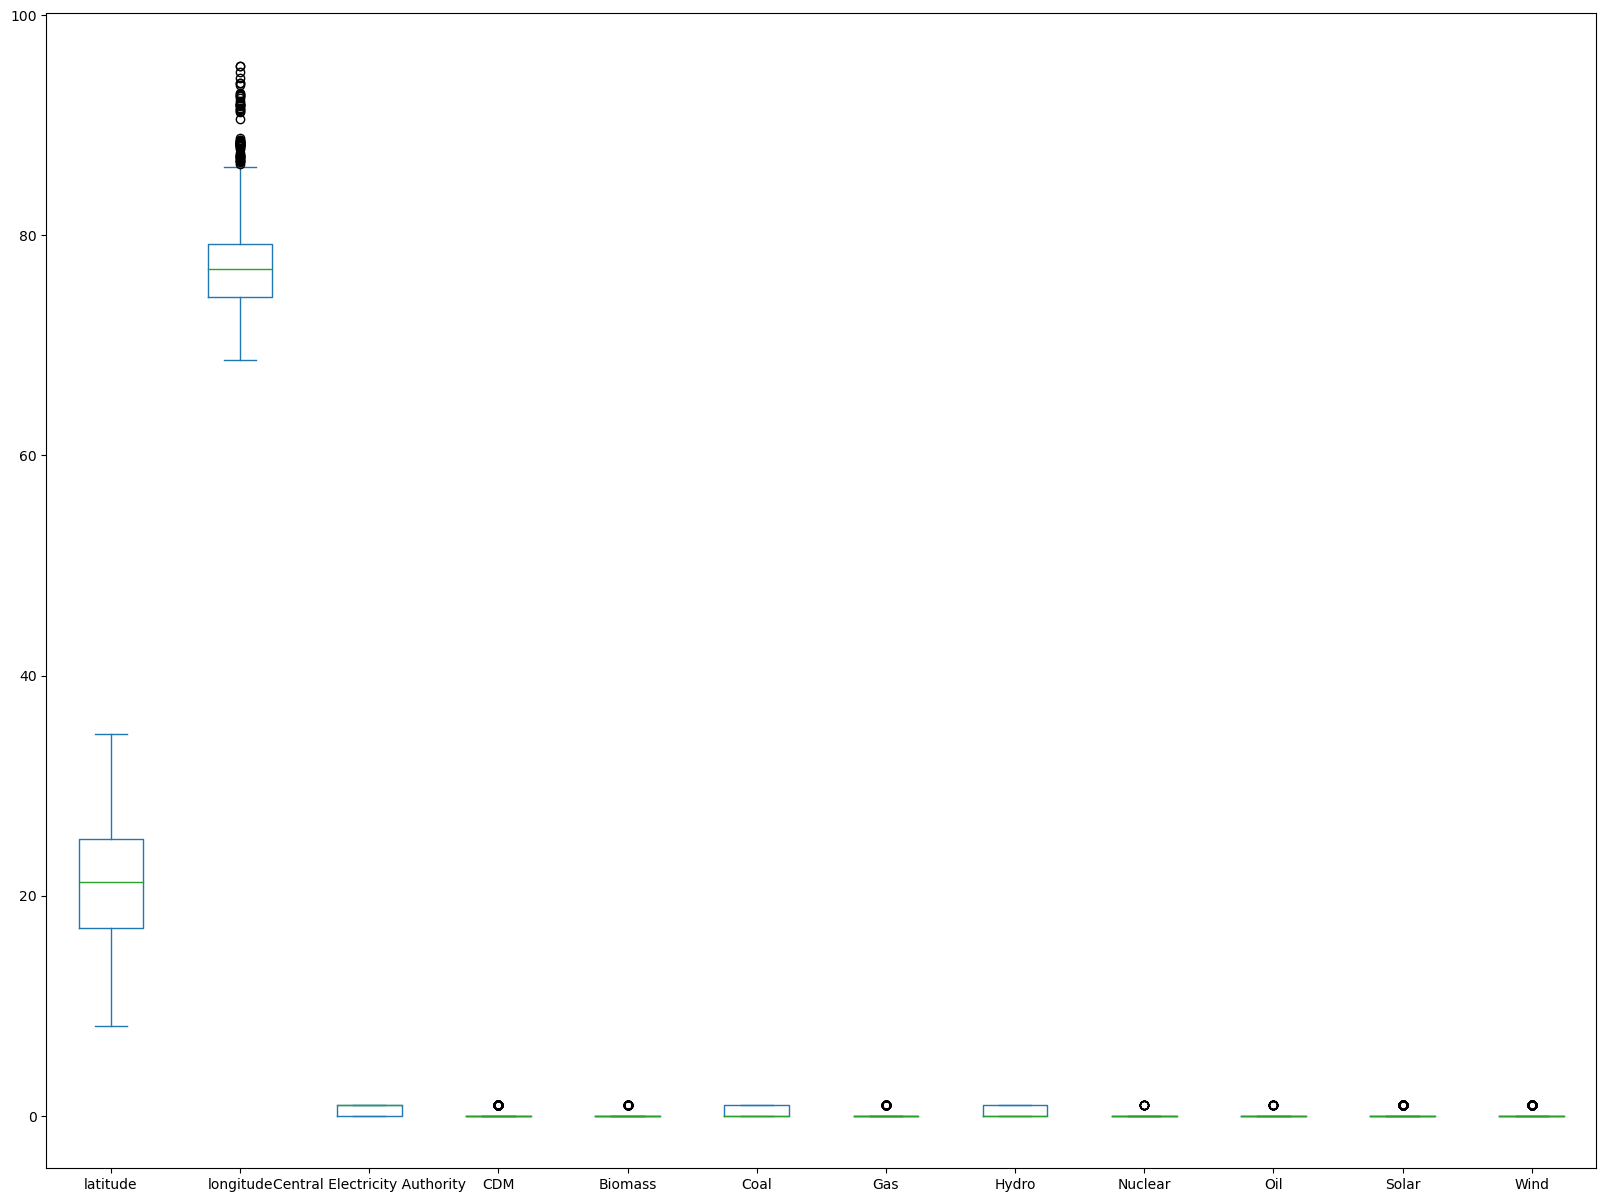

In [84]:
x.plot(kind='box',figsize=(20,15))

.

.

In [85]:
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [86]:
from sklearn.linear_model import SGDRegressor

In [87]:
from sklearn.metrics import accuracy_score , confusion_matrix

In [88]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.10 ,random_state=42)

x_train_sca=x_train
x_test_sca=x_test

.

-0.28865526408116526
RMSE : 436.37414888445153


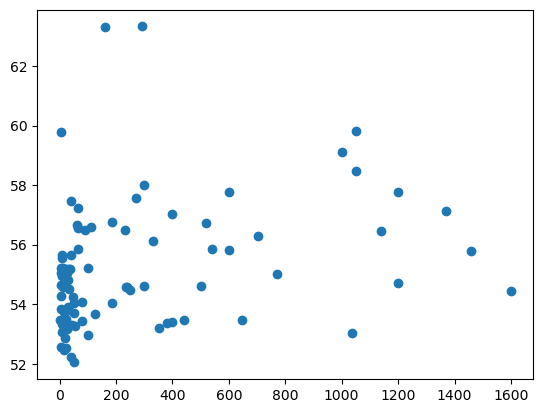

In [89]:
svm = SVR()
svm.fit(x_train_sca,y_train)
y_pred1 = svm.predict(x_test_sca)
svm1 = metrics.r2_score(y_test,y_pred1)
print(svm1)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))

plt.scatter(x=y_test,y=y_pred1)

0.4551527172927433
RMSE : 283.7448797616161


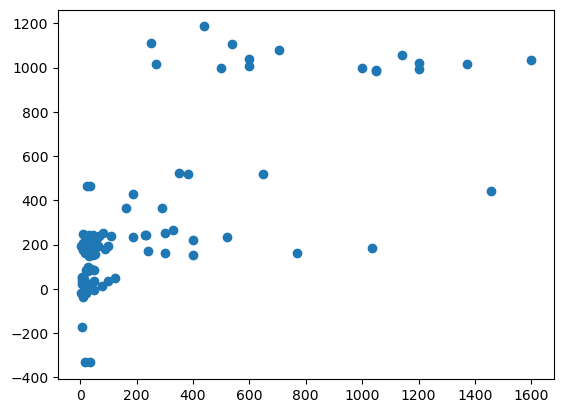

In [90]:
lr= LinearRegression()
lr.fit(x_train_sca,y_train)
y_pred2 = lr.predict(x_test_sca)
lr2 = metrics.r2_score(y_test,y_pred2)
print(lr2)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

plt.scatter(x=y_test,y=y_pred2)

0.2433792072175276
RMSE : 334.3719013094608


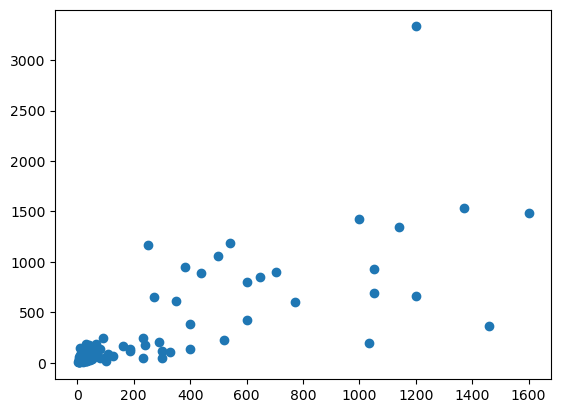

In [91]:
rfr= RandomForestRegressor()
rfr.fit(x_train_sca,y_train)
y_pred3 = rfr.predict(x_test_sca)
rfr3 = metrics.r2_score(y_test,y_pred3)

print(rfr3)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred3)))

plt.scatter(x=y_test,y=y_pred3)

In [35]:
rfr= RandomForestRegressor(max_samples=0.75,max_depth=50,
            max_features=15,
            min_samples_split=4,
            n_estimators=300,criterion='squared_error',random_state=42)
rfr.fit(x_train_sca,y_train)
y_pred3 = rfr.predict(x_test_sca)
rfr3 = metrics.r2_score(y_test,y_pred3)
print(rfr3)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred3)))

0.4065609848831694
RMSE : 425.2922974811231


In [37]:
rfr_param = {'max_depth':[5,10,15,20],
            'max_features':[5,7,8,'auto'],
            'min_samples_split':[4,8,16,24],
            'n_estimators':[100,200,300,400,500]}
clf = GridSearchCV(rfr, rfr_param,cv=5)
clf.fit(x_train_sca,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=50, max_features=15,
                                             max_samples=0.75,
                                             min_samples_split=4,
                                             n_estimators=300,
                                             random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [5, 7, 8, 'auto'],
                         'min_samples_split': [4, 8, 16, 24],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [38]:
print(clf.best_score_)
print(clf.best_params_)

0.5143168750743137
{'max_depth': 20, 'max_features': 8, 'min_samples_split': 8, 'n_estimators': 100}


-0.5806981585025186
RMSE : 483.2981273350316


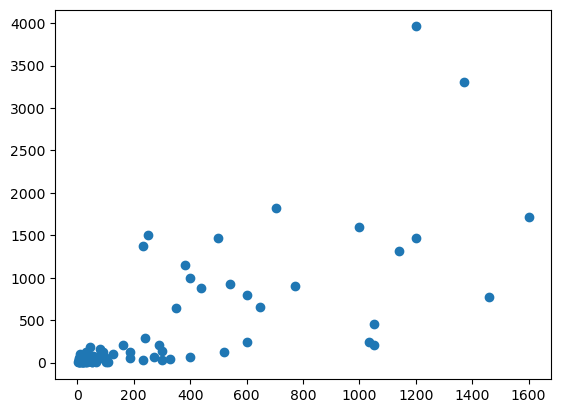

In [92]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train_sca,y_train)
y_pred5= dtr.predict(x_test_sca)
dtr5 = metrics.r2_score(y_test,y_pred5)
print(dtr5)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred5)))

plt.scatter(x=y_test,y=y_pred5)

0.4815452111332875
RMSE : 276.78725194664503


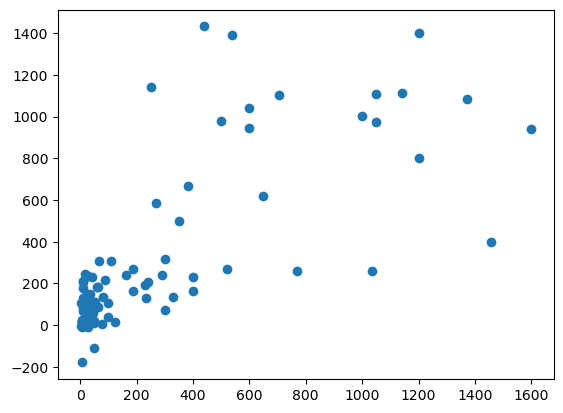

In [93]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train_sca,y_train)
y_pred4= gbr.predict(x_test_sca)
gbr4 = metrics.r2_score(y_test,y_pred4)
print(gbr4)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred4)))

plt.scatter(x=y_test,y=y_pred4)

0.4257841687470846
RMSE : 291.29177346182104


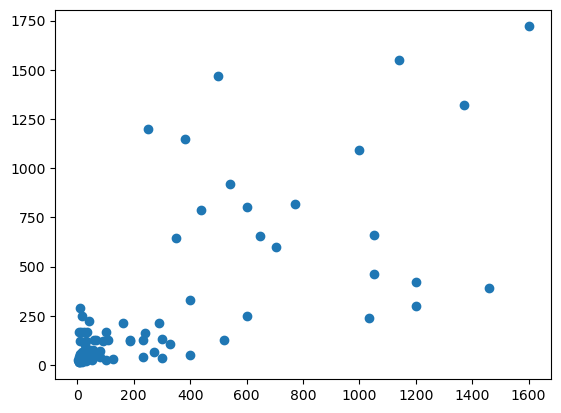

In [105]:
abr = AdaBoostRegressor(base_estimator=dtr)
abr.fit(x_train_sca,y_train)
y_pred5= abr.predict(x_test_sca)
abr5 = metrics.r2_score(y_test,y_pred5)
print(abr5)
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test,y_pred5)))

plt.scatter(x=y_test,y=y_pred5)

.

.

# 2 (CLASSIFICATION)

.

In [21]:
df

,capacity_mw,latitude,longitude,primary_fuel,source
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd
2,39.2,21.9038,69.3732,Wind,CDM
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority
...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Central Electricity Authority
903,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited
904,25.5,15.2758,75.5811,Wind,CDM
905,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd


In [22]:
top_2 = [df for df in df['source'].value_counts().sort_values(ascending=False).head(2).index]

for label in top_2:
    df[label]= np.where(df['source']==label,1,0)
    
df[['source']+top_2].head()

,source,Central Electricity Authority,CDM
0,National Renewable Energy Laboratory,0,0
1,Ultratech Cement ltd,0,0
2,CDM,0,1
3,Central Electricity Authority,1,0
4,Central Electricity Authority,1,0


In [23]:
df=df.drop('source',axis=1)

In [24]:
df['primary_fuel']=pd.factorize(df['primary_fuel'])[0]

<Axes: >

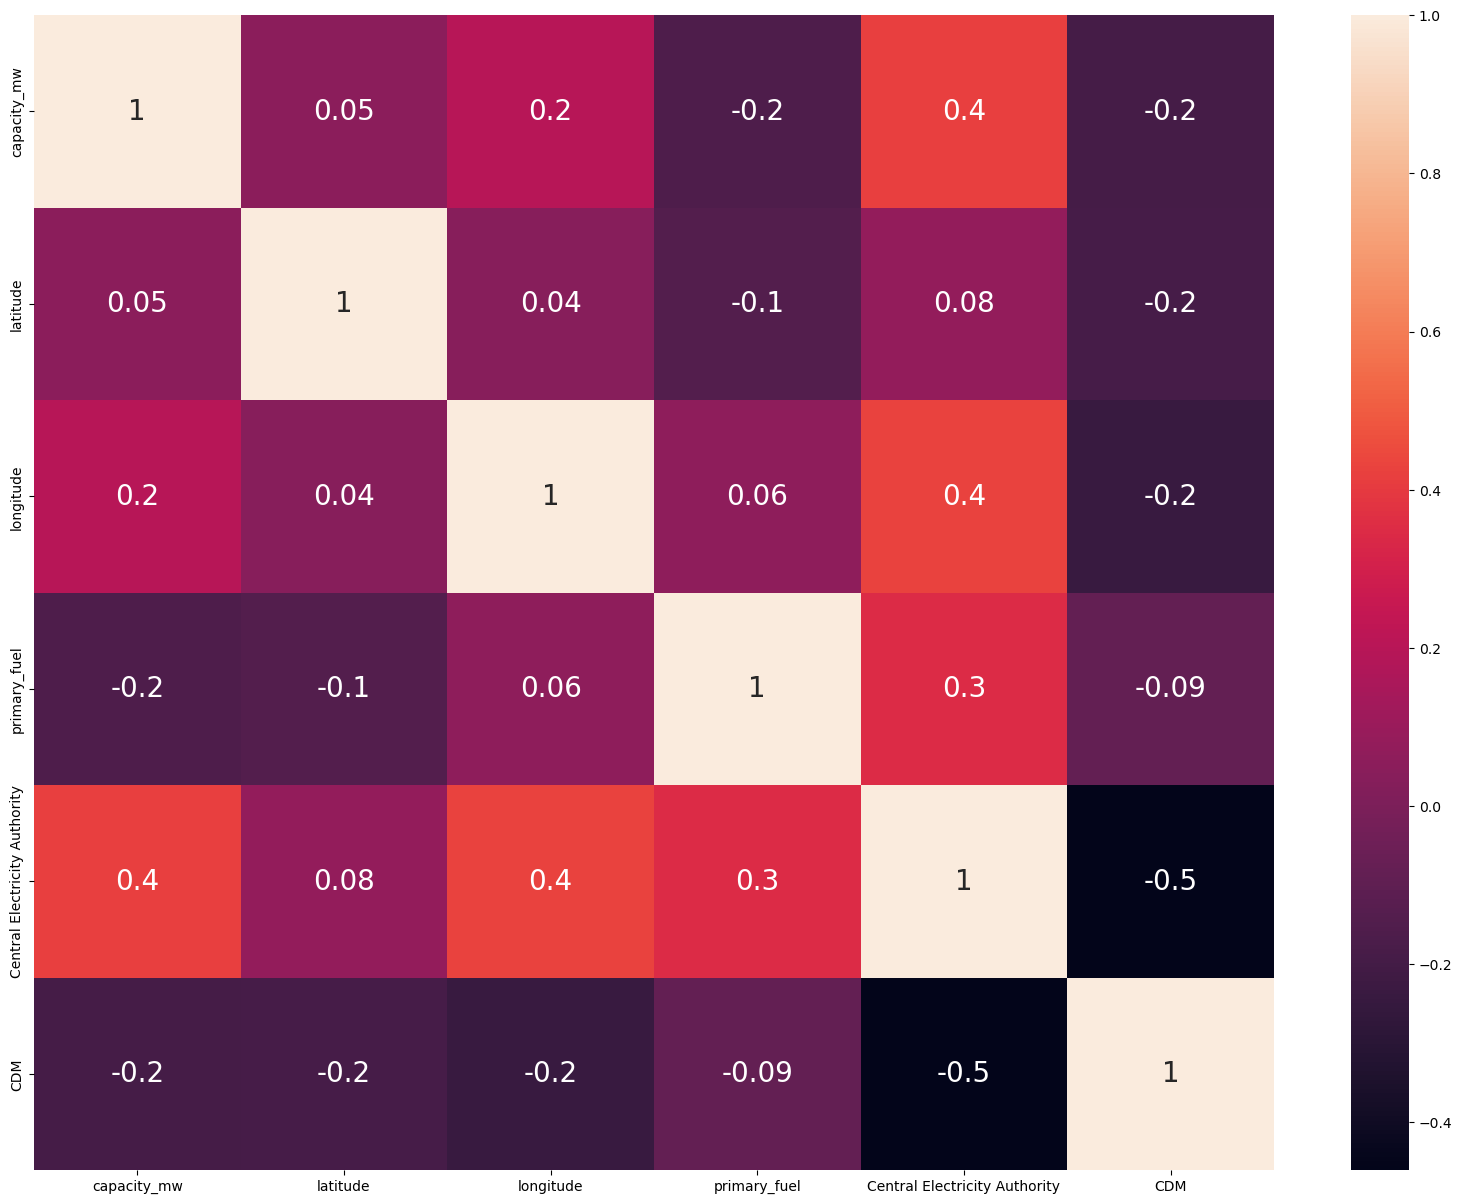

In [25]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':20})

.

.

In [26]:
x = df.drop('primary_fuel',axis=1)
y = df['primary_fuel']

In [27]:
x

,capacity_mw,latitude,longitude,Central Electricity Authority,CDM
0,2.5,28.1839,73.2407,0,0
1,98.0,24.7663,74.6090,0,0
2,39.2,21.9038,69.3732,0,1
3,135.0,23.8712,91.3602,1,0
4,1800.0,21.9603,82.4091,1,0
...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,0
903,3.0,12.8932,78.1654,0,0
904,25.5,15.2758,75.5811,0,1
905,80.0,24.3500,73.7477,0,0


In [28]:
from sklearn.ensemble import GradientBoostingClassifier , AdaBoostClassifier , BaggingClassifier , RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state=42,test_size=0.30)

x_train_sca = x_train
x_test_sca = x_test

In [32]:
from sklearn.linear_model import SGDClassifier
result = cross_val_score(SGDClassifier(),df,y,cv=5)
print(result.mean())
print(result.std())

0.4499605367008682
0.07255715197944283


.

In [38]:
knn =KNeighborsClassifier()
knn.fit(x_train_sca,y_train)
knny_pred = knn.predict(x_test_sca)

print(accuracy_score(y_test,knny_pred))
print(classification_report(y_test,knny_pred))

recheck = cross_val_score(knn,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,knny_pred) - recheck.mean())

0.4981684981684982
              precision    recall  f1-score   support

           0       0.47      0.56      0.51        27
           1       0.55      0.69      0.62        75
           2       0.54      0.45      0.49        42
           3       0.40      0.17      0.24        24
           4       0.58      0.48      0.53        85
           5       0.14      0.44      0.22         9
           6       0.00      0.00      0.00         8
           7       1.00      0.33      0.50         3

    accuracy                           0.50       273
   macro avg       0.46      0.39      0.39       273
weighted avg       0.51      0.50      0.49       273

[0.5        0.53296703 0.5359116  0.57458564 0.50276243]
0.529245340295064
difference -0.031076842126565807


In [39]:
abc =AdaBoostClassifier()
abc.fit(x_train_sca,y_train)
abcy_pred = abc.predict(x_test_sca)

print(accuracy_score(y_test,abcy_pred))
print(classification_report(y_test,abcy_pred))

recheck = cross_val_score(abc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,abcy_pred) - recheck.mean())

0.41025641025641024
              precision    recall  f1-score   support

           0       0.26      1.00      0.41        27
           1       0.00      0.00      0.00        75
           2       0.00      0.00      0.00        42
           3       0.00      0.00      0.00        24
           4       0.51      1.00      0.67        85
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         3

    accuracy                           0.41       273
   macro avg       0.10      0.25      0.14       273
weighted avg       0.18      0.41      0.25       273

[0.54945055 0.42307692 0.4198895  0.41436464 0.41436464]
0.4442292514115719
difference -0.03397284115516164


In [41]:
gs = GaussianNB()
gs.fit(x_train_sca,y_train)
gsy_pred = gs.predict(x_test_sca)

print(accuracy_score(y_test,gsy_pred))
print(classification_report(y_test,gsy_pred))

recheck = cross_val_score(gs,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gsy_pred) - recheck.mean())

0.652014652014652
              precision    recall  f1-score   support

           0       0.48      0.59      0.53        27
           1       0.80      0.37      0.51        75
           2       1.00      1.00      1.00        42
           3       0.00      0.00      0.00        24
           4       0.61      0.99      0.76        85
           5       0.31      0.89      0.46         9
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         3

    accuracy                           0.65       273
   macro avg       0.40      0.48      0.41       273
weighted avg       0.62      0.65      0.60       273

[0.65384615 0.64835165 0.65745856 0.71270718 0.6519337 ]
0.6648594499423228
difference -0.012844797927670792


In [42]:
rfc= RandomForestClassifier()
rfc.fit(x_train_sca,y_train)
rfcy_pred = rfc.predict(x_test_sca)

print(accuracy_score(y_test,rfcy_pred))
print(classification_report(y_test,rfcy_pred))

recheck = cross_val_score(rfc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred))

0.8095238095238095
              precision    recall  f1-score   support

           0       0.96      0.81      0.88        27
           1       0.77      0.81      0.79        75
           2       1.00      1.00      1.00        42
           3       0.58      0.46      0.51        24
           4       0.87      0.91      0.89        85
           5       0.44      0.78      0.56         9
           6       0.20      0.12      0.15         8
           7       0.00      0.00      0.00         3

    accuracy                           0.81       273
   macro avg       0.60      0.61      0.60       273
weighted avg       0.80      0.81      0.80       273

[0.81318681 0.81318681 0.84530387 0.79558011 0.80662983]
0.8147774877056646
difference -0.00525367818185507
[[22  2  0  0  0  3  0  0]
 [ 0 61  0  5  3  6  0  0]
 [ 0  0 42  0  0  0  0  0]
 [ 0  6  0 11  3  0  4  0]
 [ 0  6  0  2 77  0  0  0]
 [ 1  1  0  0  0  7  0  0]
 [ 0  2  0  1  4  0  1  0]
 [ 0  1  0  0  2  0  0  0]]


<Axes: >

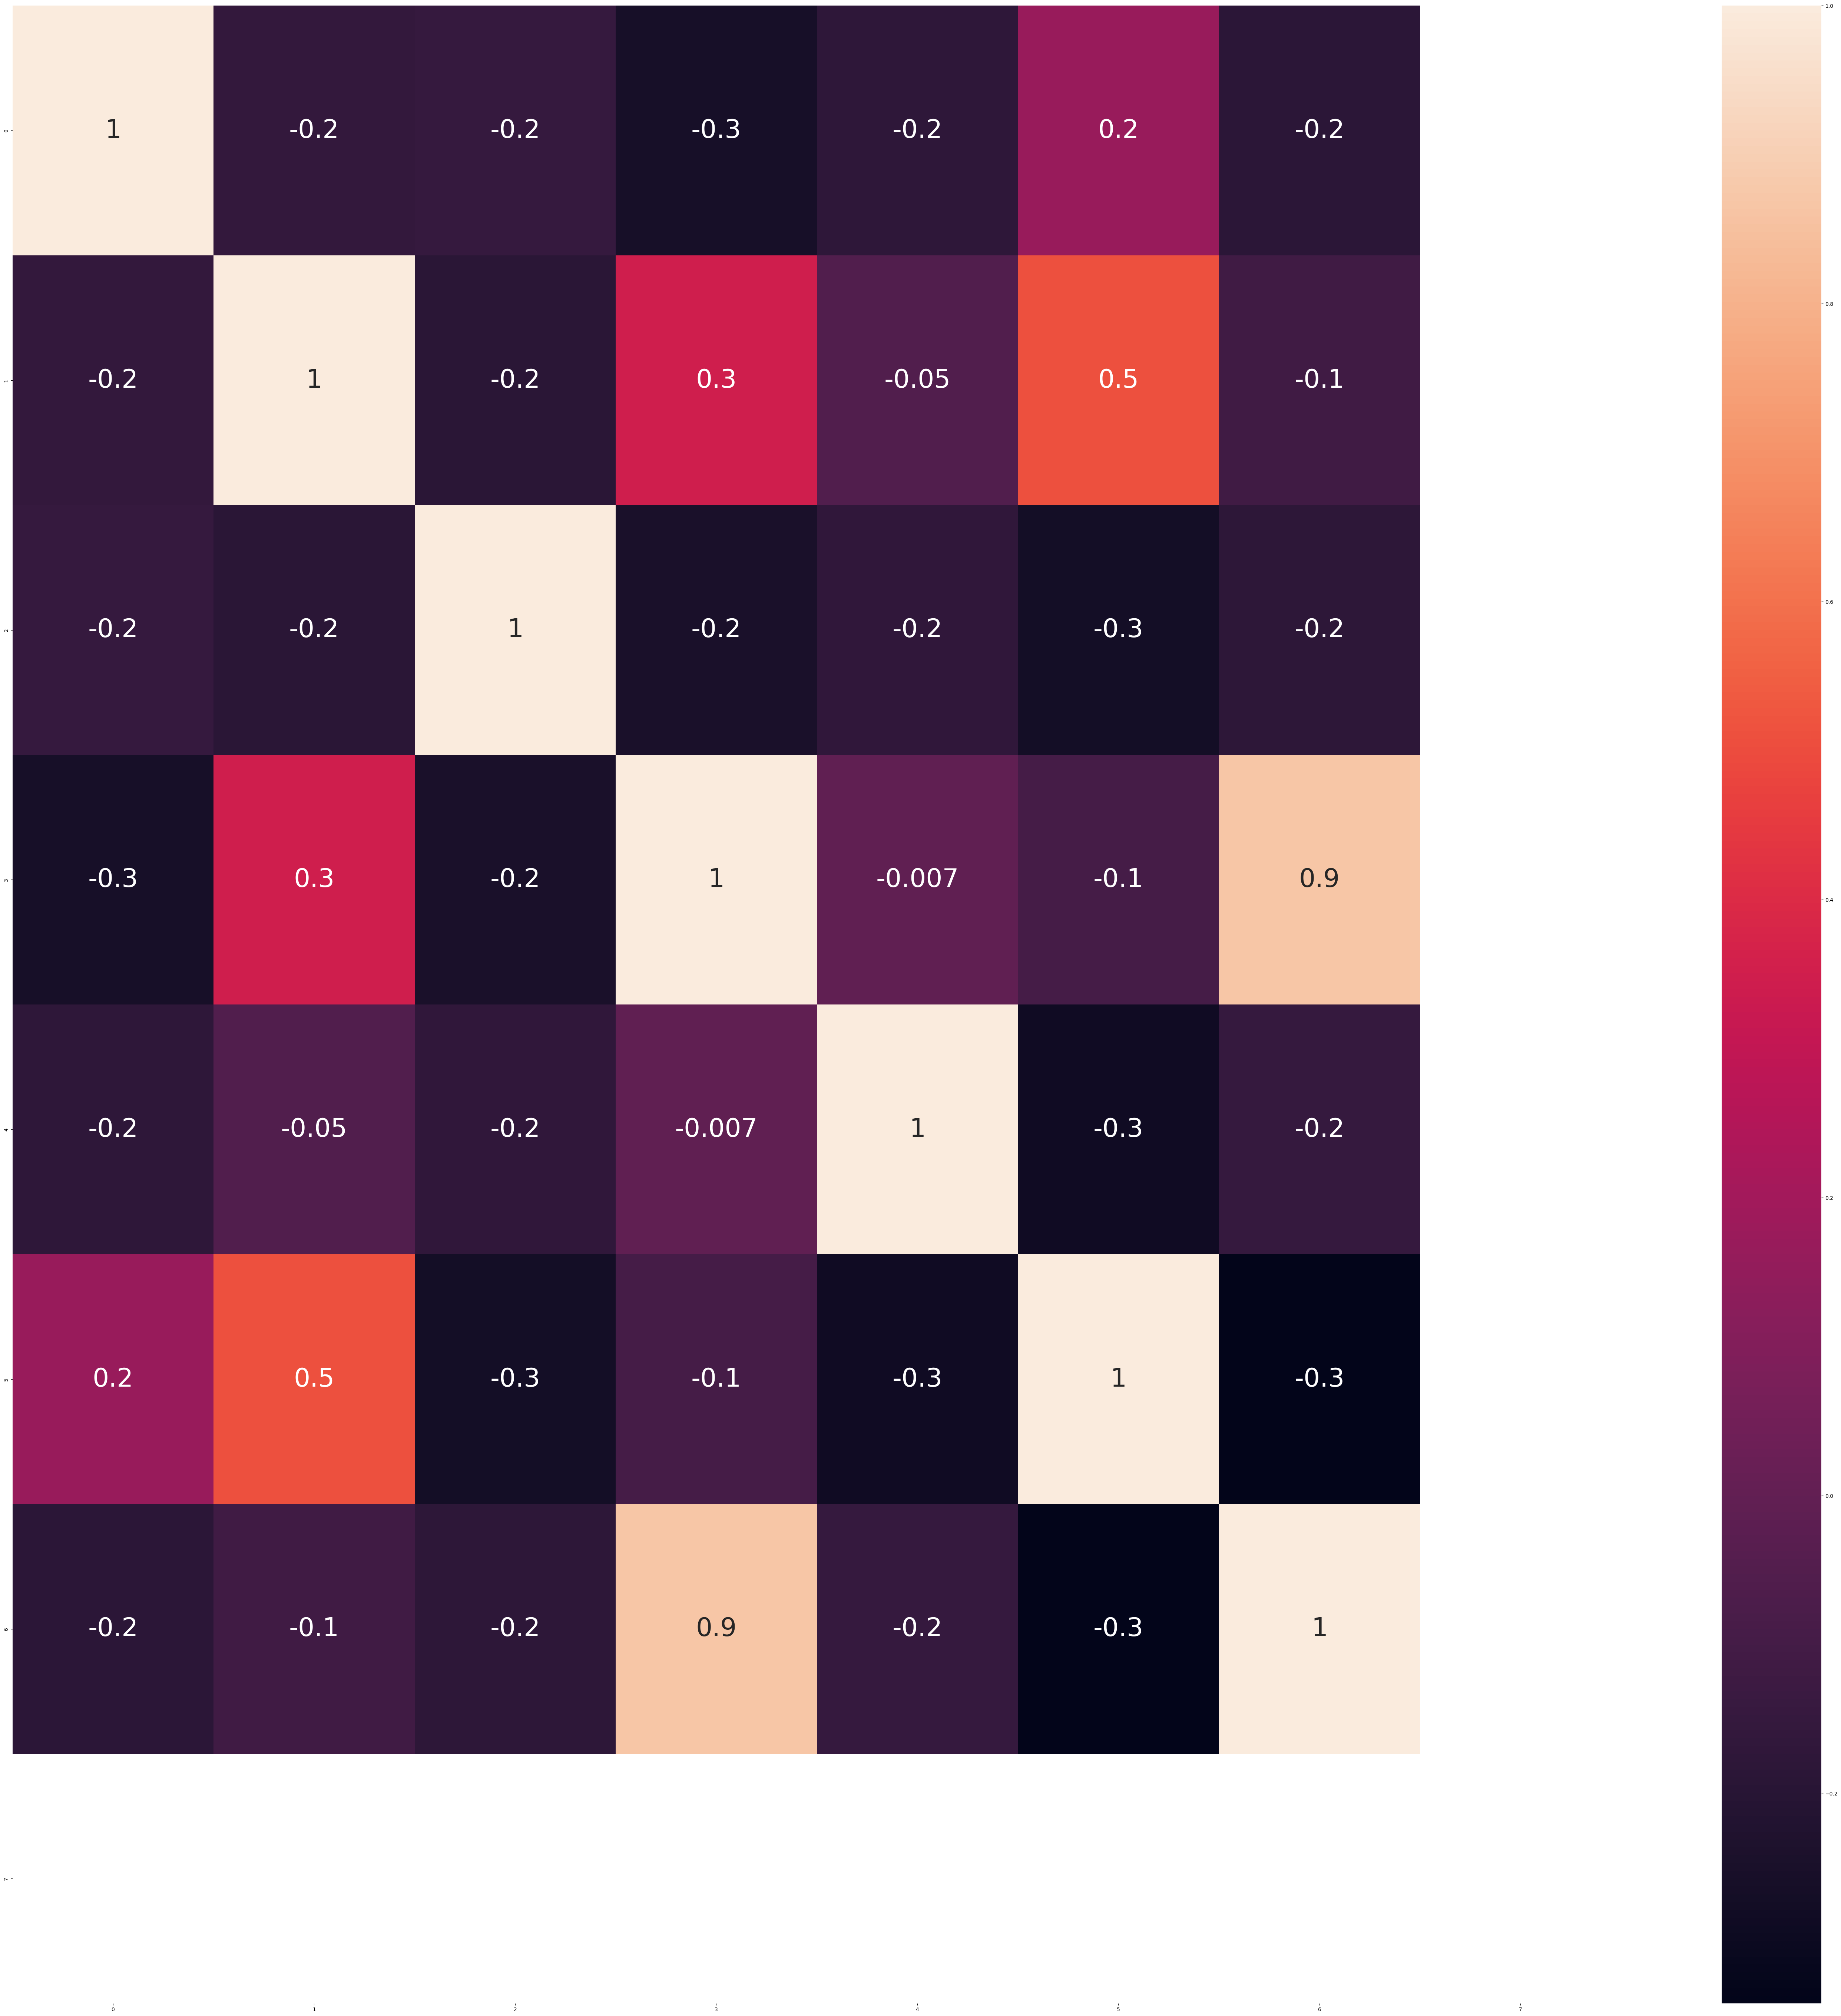

In [43]:
www = confusion_matrix(y_test,rfcy_pred)
www=pd.DataFrame(www)
plt.figure(figsize=(70,70))
sns.heatmap(www.corr(),fmt='.1g',annot=True,annot_kws={'fontsize':50})

In [50]:
rfc_param = {'max_depth':[5,10,15,20],
            'max_features':[5,7,8,'auto'],
            'min_samples_split':[4,8,16,24],
            'n_estimators':[100,200,300,400,500]}
clf = GridSearchCV(rfc, rfc_param,cv=5)
clf.fit(x_train_sca,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [5, 7, 8, 'auto'],
                         'min_samples_split': [4, 8, 16, 24],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [51]:
print(clf.best_score_)
print(clf.best_params_)

0.8170603674540683
{'max_depth': 15, 'max_features': 5, 'min_samples_split': 4, 'n_estimators': 400}


In [54]:
rfc2= RandomForestClassifier(max_depth=15, max_features=5, min_samples_split=4, n_estimators=400)
rfc2.fit(x_train_sca,y_train)
rfcy_pred2 = rfc2.predict(x_test_sca)

print(accuracy_score(y_test,rfcy_pred2))
print(classification_report(y_test,rfcy_pred2))

recheck = cross_val_score(rfc2,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,rfcy_pred2) - recheck.mean())
print(confusion_matrix(y_test,rfcy_pred2))

0.7838827838827839
              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.75      0.75      0.75        75
           2       1.00      1.00      1.00        42
           3       0.47      0.33      0.39        24
           4       0.84      0.91      0.87        85
           5       0.54      0.78      0.64         9
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         3

    accuracy                           0.78       273
   macro avg       0.55      0.58      0.56       273
weighted avg       0.76      0.78      0.77       273

[0.81868132 0.80769231 0.82872928 0.80662983 0.79005525]
0.8103575982029021
difference -0.026474814320118223
[[24  1  0  0  0  2  0  0]
 [ 4 56  0  5  5  4  1  0]
 [ 0  0 42  0  0  0  0  0]
 [ 0  8  0  8  4  0  3  1]
 [ 0  6  0  2 77  0  0  0]
 [ 1  1  0  0  0  7  0  0]
 [ 0  2  0  1  5  0  0  0]
 [ 0  1  0  1  1  0  0  0]]


In [40]:
gbc = GradientBoostingClassifier()
gbc.fit(x_train_sca,y_train)
gbcy_pred = gbc.predict(x_test_sca)

print(accuracy_score(y_test,gbcy_pred))
print(classification_report(y_test,gbcy_pred))

recheck = cross_val_score(gbc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,gbcy_pred) - recheck.mean())

0.7912087912087912
              precision    recall  f1-score   support

           0       0.88      0.78      0.82        27
           1       0.73      0.81      0.77        75
           2       1.00      1.00      1.00        42
           3       0.64      0.29      0.40        24
           4       0.82      0.89      0.85        85
           5       0.50      0.78      0.61         9
           6       0.00      0.00      0.00         8
           7       1.00      0.67      0.80         3

    accuracy                           0.79       273
   macro avg       0.70      0.65      0.66       273
weighted avg       0.78      0.79      0.78       273

[0.80769231 0.82967033 0.82872928 0.80110497 0.75690608]
0.8048205937708699
difference -0.013611802562078723


In [45]:
bc = BaggingClassifier()
bc.fit(x_train_sca,y_train)
bcy_pred = bc.predict(x_test_sca)

print(accuracy_score(y_test,bcy_pred))
print(classification_report(y_test,bcy_pred))

recheck = cross_val_score(bc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,bcy_pred) - recheck.mean())

0.7728937728937729
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        27
           1       0.71      0.77      0.74        75
           2       1.00      1.00      1.00        42
           3       0.38      0.33      0.36        24
           4       0.84      0.87      0.86        85
           5       0.55      0.67      0.60         9
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         3

    accuracy                           0.77       273
   macro avg       0.55      0.56      0.55       273
weighted avg       0.75      0.77      0.76       273

[0.78021978 0.77472527 0.82872928 0.76243094 0.75690608]
0.7806022706575193
difference -0.00770849776374638


In [46]:
lr = LogisticRegression()
lr.fit(x_train_sca,y_train)
lry_pred = lr.predict(x_test_sca)

print(classification_report(y_test,lry_pred))

recheck = cross_val_score(lr,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,lry_pred) - recheck.mean())

              precision    recall  f1-score   support

           0       0.33      0.63      0.43        27
           1       0.65      0.57      0.61        75
           2       0.25      0.36      0.30        42
           3       0.00      0.00      0.00        24
           4       0.40      0.45      0.42        85
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         3

    accuracy                           0.41       273
   macro avg       0.20      0.25      0.22       273
weighted avg       0.37      0.41      0.39       273

[0.46153846 0.46703297 0.45303867 0.47513812 0.49171271]
0.4696921862667719
difference -0.055772772347358


In [47]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train_sca,y_train)
dtcy_pred = dtc.predict(x_test_sca)

print(accuracy_score(y_test,dtcy_pred))
print(classification_report(y_test,dtcy_pred))

recheck = cross_val_score(dtc,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,dtcy_pred) - recheck.mean())

0.7545787545787546
              precision    recall  f1-score   support

           0       0.86      0.89      0.87        27
           1       0.67      0.72      0.69        75
           2       1.00      1.00      1.00        42
           3       0.41      0.38      0.39        24
           4       0.83      0.84      0.83        85
           5       0.71      0.56      0.63         9
           6       0.20      0.12      0.15         8
           7       0.00      0.00      0.00         3

    accuracy                           0.75       273
   macro avg       0.58      0.56      0.57       273
weighted avg       0.74      0.75      0.75       273

[0.73076923 0.72527473 0.78453039 0.75690608 0.74033149]
0.7475623823690123
difference 0.007016372209742272


In [48]:
model= SVC()
model.fit(x_train_sca,y_train)
modely_pred = model.predict(x_test_sca)

print(accuracy_score(y_test,modely_pred))
print(classification_report(y_test,modely_pred))

recheck = cross_val_score(model,x,y)
print(recheck)
print(recheck.mean())
print("difference",accuracy_score(y_test,modely_pred) - recheck.mean())

0.4065934065934066
              precision    recall  f1-score   support

           0       0.22      0.85      0.35        27
           1       0.66      0.57      0.61        75
           2       0.00      0.00      0.00        42
           3       0.00      0.00      0.00        24
           4       0.43      0.53      0.47        85
           5       0.00      0.00      0.00         9
           6       0.00      0.00      0.00         8
           7       0.00      0.00      0.00         3

    accuracy                           0.41       273
   macro avg       0.16      0.24      0.18       273
weighted avg       0.34      0.41      0.35       273

[0.37912088 0.38461538 0.42541436 0.41436464 0.4198895 ]
0.4046809544047113
difference 0.0019124521886952905


## Random Forest Classifier and Gradient Boosting Classifier are the best performing